# Sprint 3 Advanced Modelling
# Attractions
---

In [1]:
# data analysis / modification 
import pandas as pd
import numpy as np
# plotting libraries
import matplotlib.pyplot as plt
# ----------------------------------------------------------------------------
# Text Analysis on Review Keywords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
# Advanced Modelling for Sprint 3 --> Content Filter Recommendation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Libraries for distance calculations in Content Filter Recommendation 
from geopy.geocoders import Nominatim
import haversine as hs   
from haversine import Unit
# Libraries for Sentiment Modelling 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Libraries for Logisitc Regression Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay

from warnings import filterwarnings
filterwarnings(action='ignore')

## Table of Contents

- Filter and Transform Latitude and Longitude
- Text Analysis on Review Keywords - CountVectorizer
- Text Analysis on Review Keywords - TfidfVectorizer 
- Advanced Modelling - Cosine Similarity and Content-Based Filtering
- Sentiment Modelling - Predict Average Positive / Negative Reviews
- Future Direction
--- 


### Filter and Transform Latitude and Longitude <a class="anchor" id="lat-lon"></a>  

View the original distribution of the `lat` and `lon` columns in the address dataset. With skewed data, the tail region may act as an outlier for the statistical model, affect a model's performance. To correct the skewed columns require using log transformation.

In [2]:
address_df = pd.read_csv('van_attractions_lat_lon_v2_merged.csv')
print(f'Shape of address_df: {address_df.shape} \n')
address_df.head()

Shape of address_df: (961, 23) 



,original_address,lat,lon,formatted,name,housenumber,street,postcode,suburb,district,...,state_code,country,country_code,confidence,confidence_city_level,confidence_street_level,confidence_building_level,attribution,attribution_license,attribution_url
0,"7815 Kingsway, Burnaby, BC V3N 3E4",49.214312,-122.940006,"7815 Kingsway, Burnaby, BC V3N 3C9, Canada",NaN,7815,Kingsway,V3N 3C9,NaN,Edmonds,...,BC,Canada,ca,1.000000,1.0,1.000000,1.000000,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
1,"7515, 200 Market Crossing #200, Burnaby, BC V5...",49.198066,-122.978829,"Barcelos, 7515 Market Crossing, Burnaby, BC V5...",Barcelos,7515,Market Crossing,V5J 0A3,Market Crossing,NaN,...,BC,Canada,ca,0.666667,1.0,0.666667,0.666667,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
2,"Market Crossing, Burnaby, BC V5J 3J3",49.199441,-122.979538,"Market Crossing, Burnaby, BC V5J 0A3, Canada",Market Crossing,NaN,Market Crossing,V5J 0A3,Market Crossing,NaN,...,BC,Canada,ca,1.000000,1.0,1.000000,NaN,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright
3,"5624 Marine Dr, Burnaby, BC V5J 3G8",49.206079,-122.982034,"5624 Marine Drive, Burnaby, BC V5J 3G8, Canada",NaN,5624,Marine Drive,V5J3G8,Big Bend,NaN,...,BC,Canada,ca,1.000000,1.0,1.000000,1.000000,© OpenAddresses contributors,BSD-3-Clause License,NaN
4,"4949 Canada Wy, Burnaby, BC V5G 4A3",49.243496,-122.973016,"Burnaby Artisan Farmers' Market, 4949 Canada W...",Burnaby Artisan Farmers' Market,4949,Canada Way,V5G 4A3,NaN,NaN,...,BC,Canada,ca,1.000000,1.0,1.000000,1.000000,© OpenStreetMap contributors,Open Database License,https://www.openstreetmap.org/copyright


In [3]:
# view columns in address_df
address_df.columns

Index(['original_address', 'lat', 'lon', 'formatted', 'name', 'housenumber',
       'street', 'postcode', 'suburb', 'district', 'city', 'county', 'state',
       'state_code', 'country', 'country_code', 'confidence',
       'confidence_city_level', 'confidence_street_level',
       'confidence_building_level', 'attribution', 'attribution_license',
       'attribution_url'],
      dtype='object')

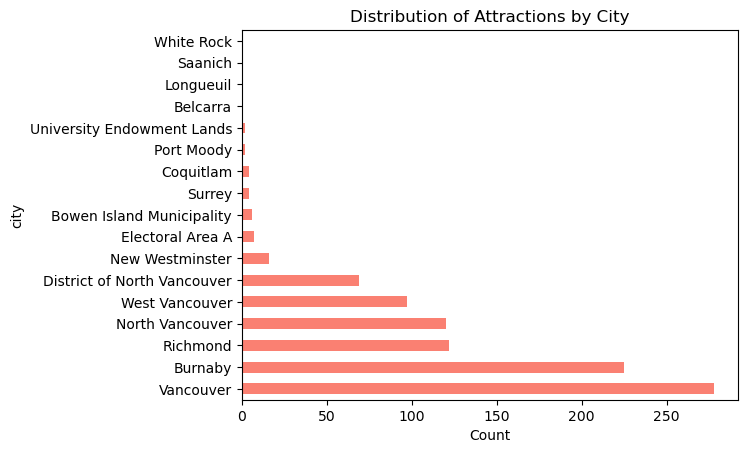

In [4]:
# Plot Horizontal Bar --> Distribution of Attractions by City
address_df['city'].value_counts().plot(kind='barh',color = 'salmon')
plt.xlabel("Count")
plt.title('Distribution of Attractions by City')
plt.show()

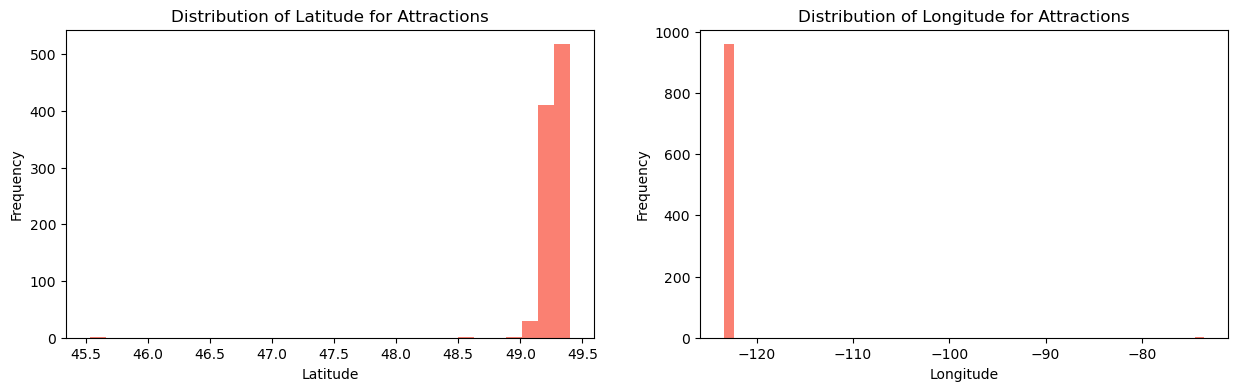

In [5]:
# view original distribuiton of latitude and longitude 
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(address_df['lat'],bins=30,color="salmon")
plt.title('Distribution of Latitude for Attractions')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(address_df['lon'],bins=50,color="salmon")
plt.title('Distribution of Longitude for Attractions')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

In [6]:
# remove the 3 outliers latitude and longitude of address_df
# 1st round locating and removing outlier 
index_outlier_1 = address_df[['lat']].idxmin()[0]
print(f"Index of 1st outlier location: {index_outlier_1} \n")
address_df = address_df.drop(index_outlier_1, axis='index')

# 2nd round locating and removing outlier
index_outlier_2 = address_df[['lat']].idxmin()[0]
print(f"Index of 2nd outlier location: {index_outlier_2} \n")
address_df = address_df.drop(index_outlier_2, axis='index')

# 3rd round locating and removing outlier
index_outlier_3 = address_df[['lat']].idxmin()[0]
print(f"Index of 3rd outlier location: {index_outlier_3} \n")
address_df = address_df.drop(index_outlier_3, axis='index')

Index of 1st outlier location: 533 

Index of 2nd outlier location: 634 

Index of 3rd outlier location: 652 



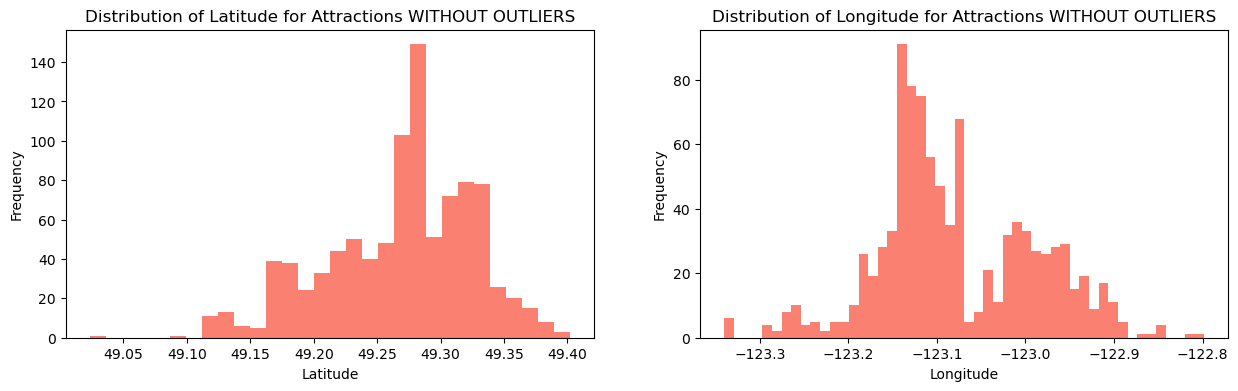

In [7]:
# view original distribuiton of latitude and longitude WITHOUT OUTLIERS
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(address_df['lat'],bins=30,color="salmon")
plt.title('Distribution of Latitude for Attractions WITHOUT OUTLIERS')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(address_df['lon'],bins=50,color="salmon")
plt.title('Distribution of Longitude for Attractions WITHOUT OUTLIERS')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

Even with removing some outliers, the latitude data is displaying left-skewed distribution and requires a log tranformation. The longitude data resembles less like a normal distribution and more like a bimodal distribution. The current values of longitude data are all negative and cannot be transformed by log due to its negative values. For now, the original longitude column will be used for the upcoming baseline model. For the next Sprint, other transformations should be explored for Longitude data.

In [8]:
# log the lat column in address_df
log_lat_df = np.log(address_df['lat'])
# display transformed log_df 
log_lat_df.head()

0    3.896184
1    3.895854
2    3.895882
3    3.896017
4    3.896777
Name: lat, dtype: float64

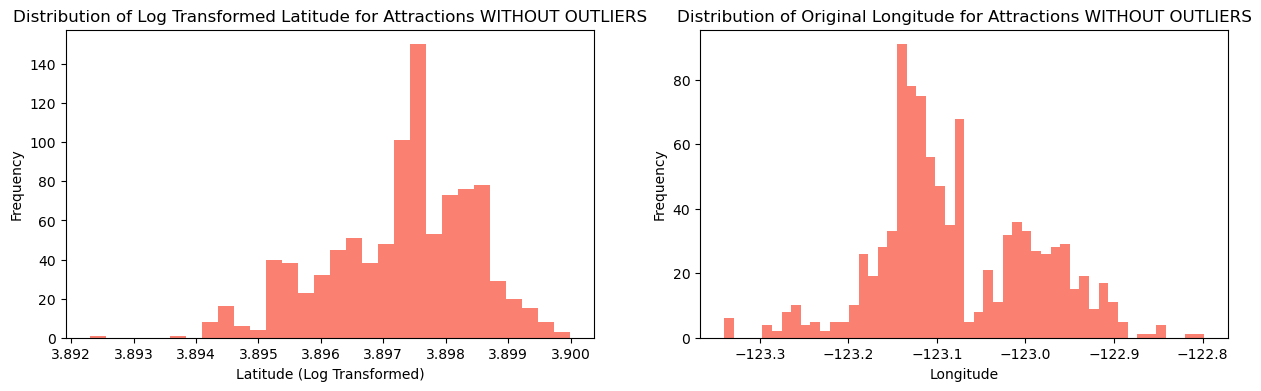

In [9]:
# view distribuiton of log transformed latitude WITHOUT OUTLIERS
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.hist(log_lat_df,bins=30,color="salmon")
plt.title('Distribution of Log Transformed Latitude for Attractions WITHOUT OUTLIERS')
plt.xlabel('Latitude (Log Transformed)')
plt.ylabel('Frequency')
# view original distribuiton of longitude WITHOUT OUTLIERS
plt.subplot(1,2,2)
plt.hist(address_df['lon'],bins=50,color="salmon")
plt.title('Distribution of Original Longitude for Attractions WITHOUT OUTLIERS')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

From the log transformation, the distribution for latitude didn't improve. For the upcoming baseline model, the latitude data prior to the log transformation will be used.

### Text Analysis on Review Keywords - CountVectorizer 
The `review_keywords` column was be modified to become an additional feature in the clustering model in Sprint 2. The values in the `review_keywords` column will fit to a count vectorizer model. The string splitting step is not required given that the column already contain lists of strings. The Review Word Frequency using CountVectorizer will be compared against the upcoming TfidfVectorizer.   

In [10]:
# load new vancouver attractions data
df = pd. read_csv('new_van_attractions.csv')

# remove outlier index in the same location as address_df for consistency and later modelling
df = df.drop([index_outlier_1,index_outlier_2,index_outlier_3], axis='index')

# view information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 0 to 960
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   place_id         958 non-null    object 
 1   name             958 non-null    object 
 2   description      476 non-null    object 
 3   reviews          958 non-null    int64  
 4   website          679 non-null    object 
 5   categories       951 non-null    object 
 6   rating           958 non-null    float64
 7   address          958 non-null    object 
 8   review_keywords  847 non-null    object 
 9   MC_park          958 non-null    bool   
 10  MC_restaurant    958 non-null    bool   
 11  MC_shopping      958 non-null    bool   
 12  MC_tourist       958 non-null    bool   
dtypes: bool(4), float64(1), int64(1), object(7)
memory usage: 78.6+ KB


In [11]:
# view first 5 rows of attraction dataset
df.head()

,place_id,name,description,reviews,website,categories,rating,address,review_keywords,MC_park,MC_restaurant,MC_shopping,MC_tourist
0,ChIJoQQNT9B3hlQRwbziEuOD0zw,Langley Farm Market,NaN,1489,https://www.langleyfarm.ca/,"Produce market, Supermarket",4.5,"7815 Kingsway, Burnaby, BC V3N 3E4","fresh, meat, parking, deli, local, cashiers, b...",False,False,False,False
1,ChIJcRtGbQ12hlQRhbiiQ5c-KSA,Kin's Farm Market,NaN,157,http://www.kinsfarmmarket.com/,Produce market,4.2,"7515, 200 Market Crossing #200, Burnaby, BC V5...","prices, quality, deals, mall, clean, parking, ...",False,False,False,False
2,ChIJRYS9gwJ3hlQRhD73njNeHfY,Marine Way Market,NaN,2178,https://www.facebook.com/MarineWayMarket/,Shopping mall,4.3,"Market Crossing, Burnaby, BC V5J 3J3","parking, groceries, strip mall, choices, coffe...",False,False,True,False
3,ChIJgzxRoT12hlQRdhSdCsG_S-Q,Hop On Farms,Open in limited capacity during Pop up sales a...,153,https://www.facebook.com/HopOnFarms/,"Produce market, Farmers' market, Garden center",4.7,"5624 Marine Dr, Burnaby, BC V5J 3G8","flowers, eggs, spring, local produce, fall, gr...",False,False,False,False
4,ChIJzwhBgwh3hlQRtUuytlsraag,Burnaby Artisan Farmers' Market,Vendors sell fresh fruit & handmade wares at t...,296,http://www.artisanmarkets.ca/our-markets/burna...,Farmers' market,4.3,"4949 Canada Wy, Burnaby, BC V5G 4A3","vendors, local, music, parking, baked goods, s...",False,False,False,False


In [12]:
# view first 10 values in review_keywords columns
df['review_keywords'].head(10)

0    fresh, meat, parking, deli, local, cashiers, b...
1    prices, quality, deals, mall, clean, parking, ...
2    parking, groceries, strip mall, choices, coffe...
3    flowers, eggs, spring, local produce, fall, gr...
4    vendors, local, music, parking, baked goods, s...
5    prices, groceries, quality, bread, selection, ...
6    prices, quality, grocery store, asian, snacks,...
7    produce, prices, flowers, quality, fresh, milk...
8    selection, clean, mall, table, lunch, vendor, ...
9    kimbap, produce, sell, hot pot, cashier, quali...
Name: review_keywords, dtype: object

In [13]:
# clean data
forbidden_char = string.punctuation + "1234567890"

def custom_tokenizer(text):
    """
    Custom tokenizer function.

    Outputs: list of tokens, list of tokens (list of strings), the clean and processing document
    """
    # lower text
    text = text.lower()

    # remove special characters
    text = re.sub(f"[{forbidden_char}]", "", text)

    # split into words as tokens
    tokens = text.split()

    # filter stopwords
    tokens = [tok for tok in tokens if tok not in ENGLISH_STOP_WORDS]

    return tokens

In [14]:
# replace null values in review_keywords column as an empty string
df['review_keywords'] = df['review_keywords'].fillna("")

# checkpoint that nan values are gone in review_keywords column
print(f"Count of Nan values in review_keywords column: {df['review_keywords'].isna().sum()} \n")

# Initialize the CountVectorizer
vector = CountVectorizer(tokenizer=custom_tokenizer)

# Fit the CountVectorizer and transform the data
X = vector.fit_transform(df['review_keywords'])

# Convert the transformed data into a DataFrame for readability
vectorized_df = pd.DataFrame(X.toarray(), columns=vector.get_feature_names_out(),index=df.index)

# view the vectorized data
print(vectorized_df)

Count of Nan values in review_keywords column: 0 

     aarti  abalone  abba  aberdeen  abgoosht  acai  accessible  actor  \
0        0        0     0         0         0     0           0      0   
1        0        0     0         0         0     0           0      0   
2        0        0     0         0         0     0           0      0   
3        0        0     0         0         0     0           0      0   
4        0        0     0         0         0     0           0      0   
..     ...      ...   ...       ...       ...   ...         ...    ...   
956      0        0     0         0         0     0           0      0   
957      0        0     0         0         0     0           0      0   
958      0        0     0         0         0     0           0      0   
959      0        0     0         0         0     0           0      0   
960      0        0     0         0         0     0           0      0   

     actors  addicts  ...  yukhoe  yum  yumcha  yvr  zaatar 

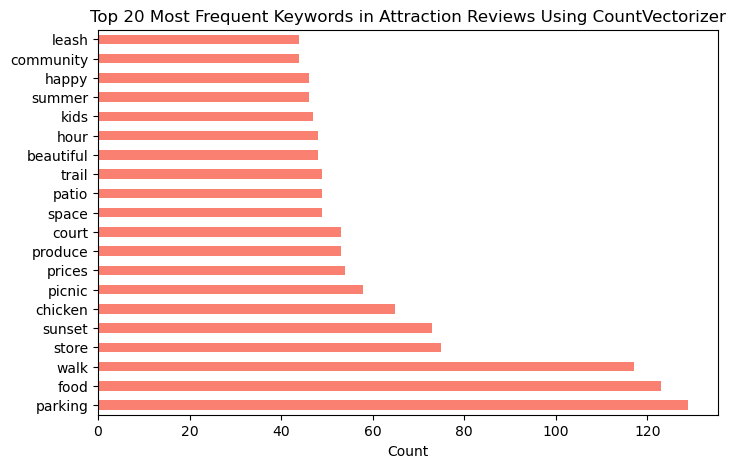

In [15]:
# Word Frequency Analysis on review_keywords
# Convert data to a series to re-attach the tokens as the index
word_counts = pd.Series(X.toarray().sum(axis=0),
                        index=vector.get_feature_names_out())
word_counts = word_counts.sort_values(ascending=False)

# plot Top 20 Most Frequent Keywords
word_counts.head(20).plot(kind="barh", figsize=(8, 5), legend=False,color = 'salmon')
plt.title("Top 20 Most Frequent Keywords in Attraction Reviews Using CountVectorizer")
plt.xlabel("Count")
#plt.xticks(rotation=45)
plt.show()

**Text Analysis - CountVectorizer Findings**

- Across all attraction types, Google Maps reviewers visiting Vancouver frequently highlight their outdoor experience (ex. sunset, trail, patio, court) and accessibility (ex. walk, parking, hour).
- Google Map reviewers take into consideration the attraction's price and community. 

### Advanced Modelling - Text Analysis on Review Keywords - TfidfVectorizer

The `review_keywords` column will be modified to be used for the upcoming recommendation system. The values in the `review_keywords` column will fit to a Term Frequency - Inverse Document Frequency Vectorizer model. The string splitting step is not required given that the column already contain lists of strings. The Review Word Frequency using TfidfVectorizer will be compared against the CountVectorizer in the previous section.   

In [16]:
# Map attraction name to its index
attraction_to_index = pd.Series(df.index, index=df['name'])

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=custom_tokenizer)

# Fit the TfidfVectorizer and transform the data
attraction_matrix = tfidf.fit_transform(df['review_keywords'])

# view attraction by 2197 tokens in the review_keywords
attraction_matrix.shape

(958, 2197)

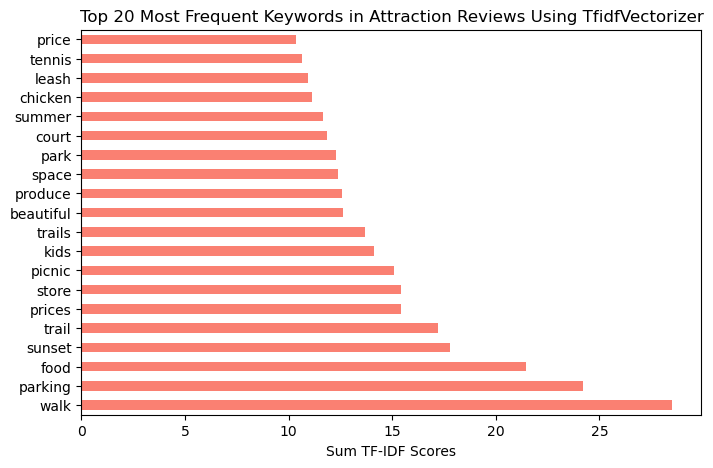

In [17]:
# convert to a series to re-attach the tokens themselves as the index
word_counts_new = pd.Series(attraction_matrix.toarray().sum(axis=0),
                        index=tfidf.get_feature_names_out())

word_counts_new = word_counts_new.sort_values(ascending=False)
# bar plot the top 20 Most Frequent Keywords in Attraction Reviews Using TfidfVectorizer
word_counts_new.head(20).plot(kind="barh", figsize=(8, 5), legend=False, color='salmon')
plt.title("Top 20 Most Frequent Keywords in Attraction Reviews Using TfidfVectorizer")
plt.xlabel("Sum TF-IDF Scores")
plt.show()

In [18]:
# Remove Infrequent Words To Reduce Dimensionality
tfidf_reduce_dim = TfidfVectorizer(
    stop_words="english",
    min_df=3,
    max_df=0.3,
    max_features=1000 # take the 1000 most common after removing stop_words and applying the word frequency based filters
)

attraction_matrix_reduce_dim = tfidf_reduce_dim.fit_transform(df['review_keywords'])

attraction_matrix_reduce_dim.shape

(958, 731)

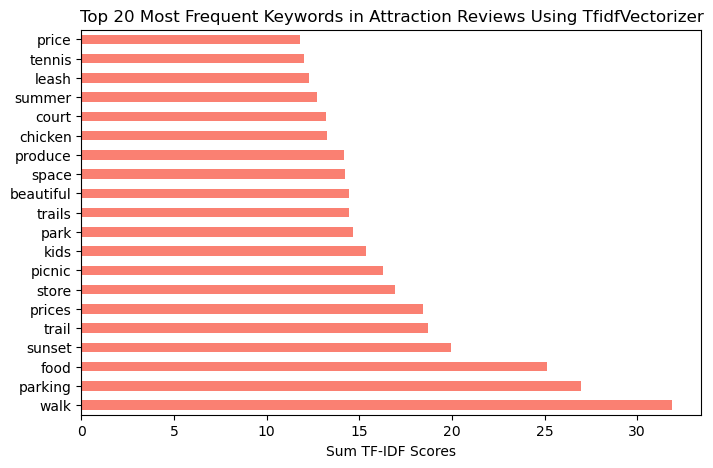

In [19]:
# convert to a series to re-attach the tokens themselves as the index
word_counts_reduce_dim = pd.Series(attraction_matrix_reduce_dim.toarray().sum(axis=0),
                        index=tfidf_reduce_dim.get_feature_names_out())

word_counts_reduce_dim = word_counts_reduce_dim.sort_values(ascending=False)

word_counts_reduce_dim.head(20).plot(kind="barh", figsize=(8, 5), legend=False, color='salmon')
plt.title("Top 20 Most Frequent Keywords in Attraction Reviews Using TfidfVectorizer")
plt.xlabel("Sum TF-IDF Scores")
plt.show()

**Text Analysis - TfidfVectorizer Findings**

Similiar to Text Analysis using CountVectorizer, google map reviewers visiting Vancouver frequently highlight their outdoor experience (ex. sunset, trails, picnic, court, tennis,park) and accessibility (ex. walk, parking, space). Google map reviewers take in consideration the attraction's price.

### Advanced Modelling - Cosine Similarity and Content-Based Filtering

The Content-Based Filtering recommendation system would take in user input and historical data of review keywords to return the top 5 recommended attractions. The necessary user inputs are the current location of the user, the attraction interest of the user, and the name of the attraction similar to their interest. The number of reviews threshold is set to 10 but can be modified by the user. The recommendation function will filter attractions by interest, calculate cosine similarity, and order by the distance between the user and attraction. The cosine similarity measures the similarity of the review keywords to other attractions. The distance difference will be calculated by using the latitude/longitude of attractions and user location to the haversine function for simplicity. The haversine function doesn't consider established road directions.

The following interest options are limited to the following and is case sensitive: park, restaurant, shopping, tourist 

ASSUMPTION: `similar_attraction_name` has the same category as `interest`

Content-Filtering Source: https://www.stratascratch.com/blog/step-by-step-guide-to-building-content-based-filtering/

Haversine Function Source: https://www.askpython.com/python/examples/find-distance-between-two-geo-locations#:~:text=To%20calculate%20the%20distance%20between%20two%20points%20based%20on%20latitude,or%20the%20great%20circle%20distance.

In [20]:
# pass the attraction_matrix into the cosine_similarity to compute the similarity between each column and every other column, returning a square matrix
co_sim = cosine_similarity(attraction_matrix_reduce_dim, dense_output=False)

# Check the shape: rows and columns should be equal, and the number of attractions we started with (rows)
co_sim.shape

(958, 958)

In [21]:
# create a Vancouver attraction recomendation function 
def attraction_recommender(similar_attraction_name, current_loc_address , interest, review_threshold=10) :  
    
    # Check if interest exists in the dictionary
    interest_column = "MC_" + interest 
    if interest_column not in df.columns:
        return f"Sorry, we don't have information on {interest}."
    
    # Check if similar_attraction_name exists in the dictionary
    if similar_attraction_name not in df['name'].unique():
        return f"Sorry, we don't have information on {similar_attraction_name}."
    
    # convert user's current location via address to latitude and longitude
    # calling the Nominatim tool and create Nominatim class
    loc = Nominatim(user_agent="Geopy Library")

    # entering the location name
    getLoc = loc.geocode(current_loc_address)

    # Get the attraction by the name
    attraction_index = df[df['name'] == similar_attraction_name].index
    
    # Create a dataframe with the attractions
    sim_df = pd.DataFrame(
        {'name':df['name'],
         'similarity': np.array(co_sim[attraction_index, :].todense()).squeeze(),
         'rating': df['rating'],
         'reviews': df['reviews'],
         'address': df['address'],
         'interest':df[interest_column],
         'latitude': address_df['lat'],
         'longitude': address_df['lon'],
        })

    # Get the attractions with over 10 reviews 
    attractions_reviews = sim_df[sim_df['reviews'] > review_threshold]

    # Get top_n attractions in specified interest
    top_attractions_interest = attractions_reviews[attractions_reviews['interest']].sort_values(by='similarity', ascending=False).head(5)

    # calculate each attraction by distance from user using haversine formula
    distance = []
    for index,row in top_attractions_interest.iterrows():
        att_loc = (row['latitude'], row['longitude'])
        user_loc = (getLoc.latitude, getLoc.longitude)   
        dis_user_att = hs.haversine(att_loc,user_loc,unit=Unit.KILOMETERS)
        distance.append(dis_user_att)
    # add distances to top_attractions_interest
    top_attractions_interest['distance_from_user_km'] = distance

    # Sort top 5 attractions by distance to user
    top_attractions_distance = top_attractions_interest.sort_values(by='distance_from_user_km', ascending=True)

    return top_attractions_distance[['name','similarity','distance_from_user_km','address','rating','reviews']]

### Recommendation Model Evaluation --> Proof of Concept

The following test cases and expected results will be explored:
- Good: Similiar attraction and interest are close to the user --> Ella the Explorer
    - Ella is currently located in 200 Burrard Street (ie. Tim Hortons in Waterfront Centre)
    - Ella is interested in park attractions similar to Stanley Park
- Bad: Similiar attraction and interest are not close to the user --> Vicky Sullivan
    - Vicky is currently located at 5000 Canoe Pass Wy (ie. Tsawwassen Mills)
    - Vicky is interested in shopping attractions similar to Metropolis at Metrotown
- Bad: Recommendations are not similar to the attraction name and interest

In [ ]:
# Test the recommender - Ella the Explorer
similar_attractions_ella = attraction_recommender(similar_attraction_name="Stanley Park",
                                                  interest = 'park',
                                                  current_loc_address = '200 Burrard Street')
similar_attractions_ella

,name,similarity,distance_from_user_km,address,rating,reviews
725,Harbour Green Park,0.362192,0.651081,"1199 W Cordova St, Vancouver, BC V6C 3P9",4.7,2453
163,Stanley Park,1.000000,2.216937,"Vancouver, BC V6G 1Z4",4.8,48883
393,Ambleside Park | West Vancouver,0.231759,4.723517,"1150 Marine Dr, West Vancouver, BC V7T 1B1",4.6,4511
105,Central Park,0.255532,9.272353,"3883 Imperial St, Burnaby, BC V5S 3R2",4.6,6307
690,Lighthouse Park | West Vancouver,0.232525,12.237173,"4902 Beacon Ln, West Vancouver, BC V7W 1K5",4.7,5200


In [ ]:
# Test the recommender - Vicky Sullivan
similar_attractions_vicky = attraction_recommender(similar_attraction_name="Metropolis at Metrotown",
                                                   interest = 'shopping',
                                                   current_loc_address = '5000 Canoe Pass Wy')
similar_attractions_vicky

,name,similarity,distance_from_user_km,address,rating,reviews
289,Metropolis at Metrotown,1.000000,21.896447,"4700 Kingsway, Burnaby, BC V5H 4M5",4.3,28707
295,Madison Centre,0.212640,26.112186,"4399 Lougheed Hwy., Burnaby, BC V5C 3Z2",3.9,1230
538,Waterfront Centre,0.231341,27.768733,"200 Granville St, Vancouver, BC V6C 1S4",4.3,113
514,Park & Tilford,0.215861,30.384723,"333 Brooksbank Ave, North Vancouver, BC V7J 3S8",4.3,752
521,The Village at Park Royal,0.222586,32.332592,"925 Main St, West Vancouver, BC V7T 2Z3",4.4,1905


**Interpretations for Recommendation Model Evaluation**

Most of the top 5 recommendations have a cosine-similarity score ranging from 0.2 to 0.4 which means that the current model can make low-moderate attraction recommendations to users. The model would require the full text of reviews rather than review keywords to improve model performance.

### Sentiment Modelling - Predict Average Positive / Negative Reviews

Fit a model and try a Logistic Regression to predict if the average review is positive or negative based on its keywords. The model used the TF-IDF vectorized texts. Simplify the sentiment analysis problem by creating a new set of ratings where less than or equal to 3.5 will count as 0 (bad), and greater than 3.5 will count as 1 (good).

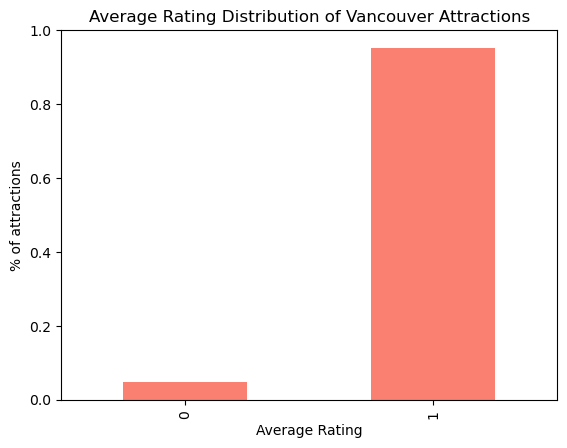

In [24]:
# create new column where 0 is a negative review on average and 1 is a positive review on average
df['new_rating'] = np.where(df['rating'] > 3.5, 1, 0)
# plot rating distribution 
df['new_rating'].value_counts(normalize=True).sort_index().plot(
    kind="bar",
    xlabel="Average Rating",
    ylabel="% of attractions",
    title="Average Rating Distribution of Vancouver Attractions",
    color = 'salmon'
)
plt.show()

In [25]:
# create variables of vectorized review_keywords and new_rating for upcoming logistic regression 
X_review_keywords = attraction_matrix_reduce_dim.copy()
y_sentiment = df['new_rating']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_review_keywords, y_sentiment, test_size=0.3, random_state=42)
# size of training data (number of attractions)
X_train.shape

(670, 731)

In [26]:
# Fitting a model - C value adjusted manually to minimize overfitting
logreg = LogisticRegression(C=0.5, max_iter=1000)
logreg.fit(X_train, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.9507462686567164
Test score: 0.9583333333333334


**Initial Findings from Logistic Regression**

The binary classification problem worked too well. No immediate signs of underfitting or overfitting. Since there are more "positive" reviews than "negative" ones, it might be better to randomly guessing.

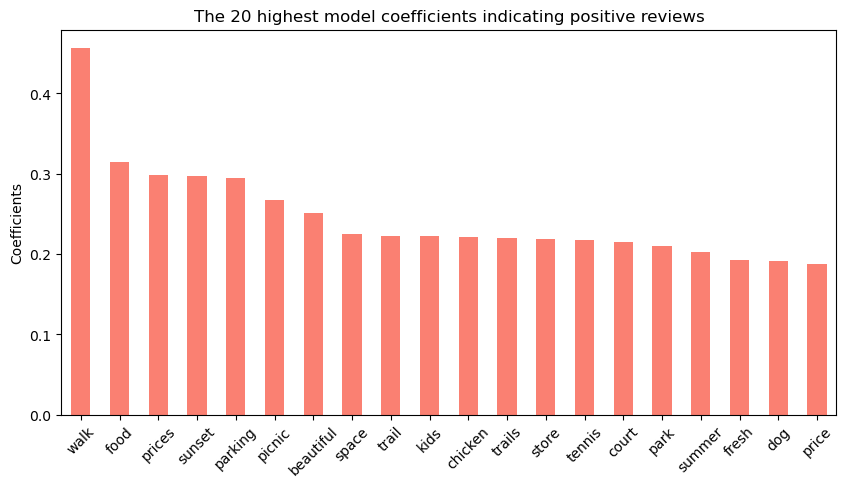

In [27]:
# coefficients for predicting positive
# note, this is not token frequency as above, but rather token importance from logistic regression analysis!
pos_coef = logreg.coef_[0] # the first column of coefficients is for predicting 'positive'
coef_names = tfidf_reduce_dim.get_feature_names_out()

# assemble a series for easy plotting
word_counts_2 = pd.Series(pos_coef,index=coef_names).sort_values(ascending=False)

word_counts_2.head(20).plot(kind="bar", figsize=(10, 5), legend=False, color = 'salmon')
plt.title("The 20 highest model coefficients indicating positive reviews")
plt.ylabel("Coefficients")
plt.xticks(rotation = 45)
plt.show()

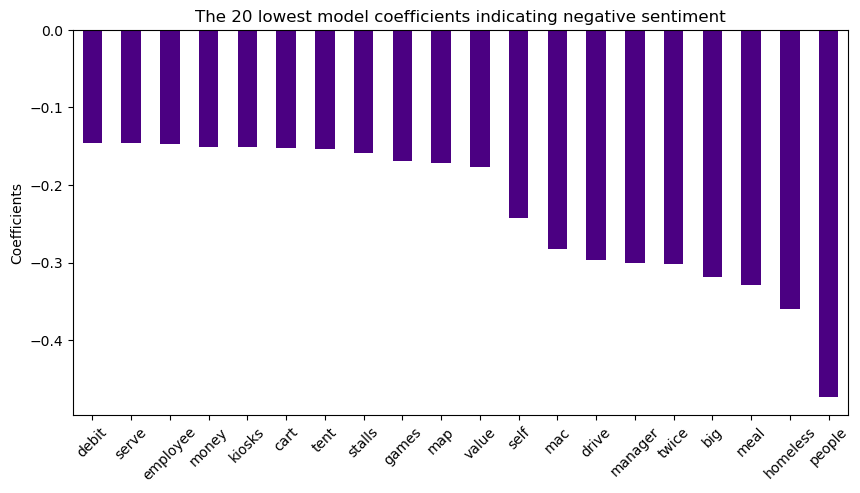

In [28]:
# most negative coefficients are most predictive of a negative review
word_counts_2.tail(20).plot(kind="bar", figsize=(10, 5), legend=False, color='indigo')
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation = 45)
plt.show()

**Actionable Insights from Logistic Regression**

From Positive Reviews
- Words such as "walk","parking",and "space" suggest that google map reviewers on average value accessibility in their attraction experience.
    - Businesses supporting tourism should consider spacious pedestrian paths towards their attraction if that hasn't been implemented yet. 
    - Businesses supporting tourism should advertise multiple ways to reach their attraction by drive, commute, or walking directions from another popular destination.  
- Words such as "picnic","trails",and "tennis" suggest that google map reviewers on average value outdoor spaces or activities in their attraction experience. 
    - Businesses supporting tourism

Due to the lack of negative reviews, the current logistic regression model displays a poor representation of words associated with negative sentiment. A future direction for this model would be to query more attractions with negative reviews on average.  

### Sentiment Model Evaluation 
A confusion matrix is best used to evaluate the performance of a classification algorithm. The high accuracy is for both train and test score is suspicious given the uneven distribution of positive and negative reviews.

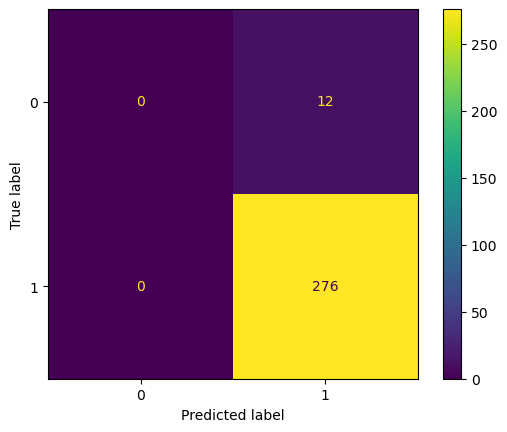

In [29]:
# Create a confusion matrix to determine how positive/negative reviews can be predicted 
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

From the confusion matrix, the current logistic regression model failed to categorize negative reviews. For future direction, more negative reviews should be collected for a better performance of sentiment modelling.

### Future Direction
- Optimize Scheduling
    - Ask the User the Duration of the Vancouver Visit --> Arrival Date, Departure Date 
    - Collect data on Attraction's operation/opening hours and days
- Optimize Money Spent
    - Ask the User their Budget
    - Collect data on Attraction's admission fees or average meal price 
- Map User’s current location and recommended attraction locations
- Collect more attractions with an average negative rating (ie. less than 3.5 out of 5) for an even distribution and a better performance of sentiment modelling